In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [2]:
dt = pd.read_csv('Mall_Customers.csv')
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dt.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

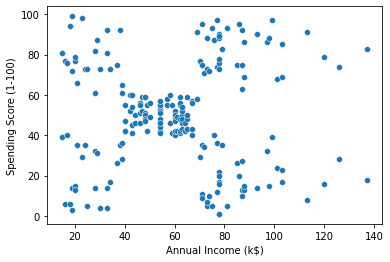

In [4]:
sns.scatterplot(data=dt,x=dt['Annual Income (k$)'],y=dt['Spending Score (1-100)'])

In [6]:
X = dt.drop(['CustomerID','Genre','Age'], axis=1)

In [7]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#K-Means Clustering

In [8]:
kMeans1 = KMeans(n_clusters = 4)
kMeans1.fit(X)

KMeans(n_clusters=4)

In [9]:
labels = kMeans1.labels_
centroids = kMeans1.cluster_centers_
centroids

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

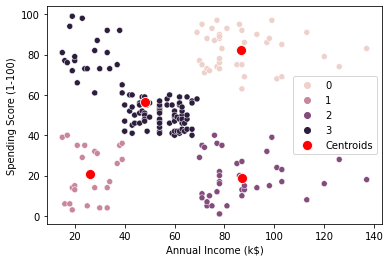

In [10]:
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, color='red', marker='o', label='Centroids')

In [11]:
wcss = []
for i in range(1, 16):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(X)  # Fit the model
    wcss.append(kmeans2.inertia_)

In [12]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30552.714025467285,
 25050.832307547524,
 21826.936303231654,
 19746.911957660894,
 17635.03342417816,
 16047.959303459302,
 14343.354592792828,
 12789.038068355792,
 11730.327898915966]

<AxesSubplot:>

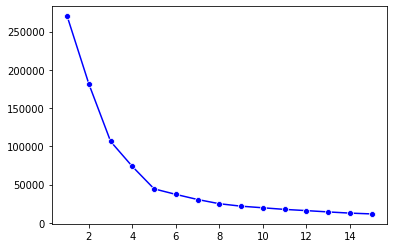

In [13]:
sns.lineplot(x=range(1, 16), y=wcss, marker='o', color='b')


In [14]:
KMeans3 = KMeans(n_clusters=5)
KMeans3.fit(X)

KMeans(n_clusters=5)

In [15]:
labels = KMeans3.labels_
centroids = KMeans3.cluster_centers_

In [16]:
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [17]:
centroids

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

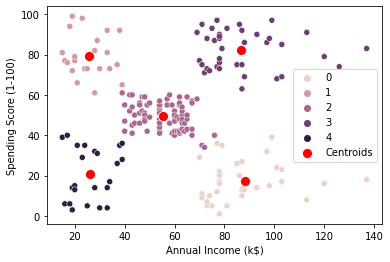

In [18]:
sns.scatterplot(data=dt, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, color='red', marker='o', label='Centroids')

In [43]:
pointX = 20
pointY = 40
predict = KMeans3.predict([[pointX,pointY]])
predict

/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

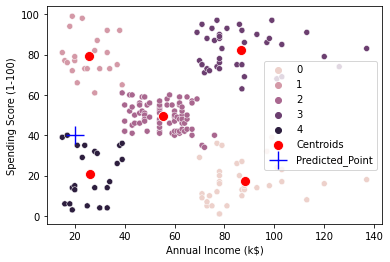

In [54]:
sns.scatterplot(data=dt, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, color='red', marker='o', label='Centroids')

sns.scatterplot(x = [pointX], y = [pointY], s=300, color = 'blue', marker = '+' ,
                label = 'Predicted_Point')


In [ ]:
#Agglomerative Clustering


In [70]:
AgClust = AgglomerativeClustering(n_clusters = 5)
AgClust = AgClust.fit_predict(X)


In [71]:
Z = hierarchy.linkage(X, 'single')

In [72]:
Z

array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 63.        , 201.        ,   1.        ,   3.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 85.        , 209.        ,   1.        ,   3.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 76.        , 212.        ,   1.        ,   3.        ],
       [ 75.        , 213.        ,   1.        ,   4.        ],
       [ 81.        , 214

In [73]:
from scipy.cluster.hierarchy import dendrogram


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [175.0, 175.0, 201.25, 201.25],
  [165.0, 165.0, 188.125, 188.125],
  [140.0, 140.0, 176.5625, 176.5625],
  [110.0, 110.0, 158.28125, 158.28125],
  [95.0, 95.0, 134.140625, 134.140625],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [295.0, 295.0, 314.375, 314.375],
  [285.0, 285.0, 304.6875, 304.6875],
  [275.0, 275.0, 294.84375, 294.84375],
  [260.0, 260.0, 284.921875, 284.921875],
  [240.0, 240.0, 272.4609375, 272.4609375],
  [114.5703125, 114.5703125, 256.2304687

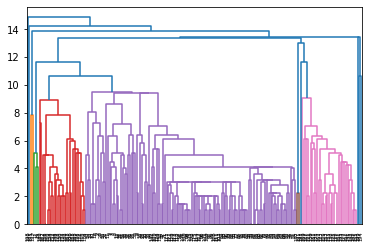

In [74]:
dendrogram(Z)